# Snake

In [1]:
import environments_fully_observable 
import environments_partially_observable
import numpy as np
from  tqdm import trange
import matplotlib.pyplot as plt
import random
import tensorflow as tf
tf.random.set_seed(0)
random.seed(0)
np.random.seed(0)

import DQN
import AStar_Heuristic

## Environment definition

In [2]:
def display_boards(env, n=5):
    
    fig,axs=plt.subplots(1,min(len(env.boards), n), figsize=(10,3))
    for ax, board in zip(axs, env.boards):
        ax.get_yaxis().set_visible(False)
        ax.get_xaxis().set_visible(False)
        ax.imshow(board, origin="lower")

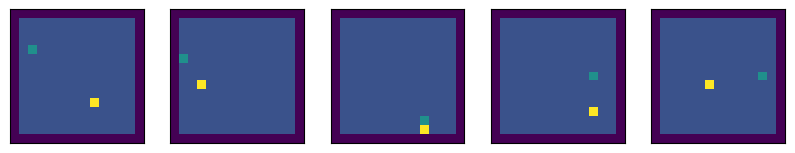

In [3]:
%matplotlib inline
# function to standardize getting an env for the whole notebook
def get_env(n=1000):
    # n is the number of boards that you want to simulate parallely
    # size is the size of each board, also considering the borders
    # mask for the partially observable, is the size of the local neighborhood
    size = 15
    e = environments_fully_observable.OriginalSnakeEnvironment(n, size)
    # e = environments_partially_observable.OriginalSnakeEnvironment(n, size, 2)
    return e
env_ = get_env()
GAMMA = .9
ITERATIONS = 1000

display_boards(env_, 5)

## Model

In [4]:
input_shape = env_.to_state().shape[1:]

DQN_agent = DQN.DQNAgent(input_shape= input_shape, num_actions= 4, gamma= GAMMA, max_buffer_size= 20000)

if tf.config.list_physical_devices('GPU'):
    print('GPU is available.')
else:
    print('GPU is not available. Switching to CPU.')



GPU is not available. Switching to CPU.


## Training

In [5]:
DQN_agent.train(env_, ITERATIONS, 64)

Epoch 0/1000 => loss: 9.412406921386719, Reward Mean: -0.004200000315904617
Epoch 1/1000 => loss: 10.745185852050781, Reward Mean: -0.008299999870359898
Epoch 2/1000 => loss: 8.432503700256348, Reward Mean: -0.008100000210106373
Epoch 3/1000 => loss: 3.183881998062134, Reward Mean: -0.007699999958276749


In [ ]:
def DQN_execute(agent, steps, env):
    rewards = np.zeros(env.n_boards, dtype=float)
    for step in trange(steps):
        state = env.to_state()
        # Select actions using the DQN agent
        actions = agent.select_actions(state).reshape(-1,1)
        # Move in the environment and get rewards
        rewards = rewards + env_.move(actions)
        display_boards(env, 10)


 19%|█▉        | 19/100 [00:02<00:07, 10.21it/s]C:\Users\user\AppData\Local\Temp\ipykernel_7096\1270395067.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig,axs=plt.subplots(1,min(len(env.boards), n), figsize=(10,3))
100%|██████████| 100/100 [00:07<00:00, 12.66it/s]


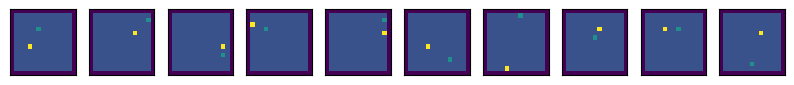

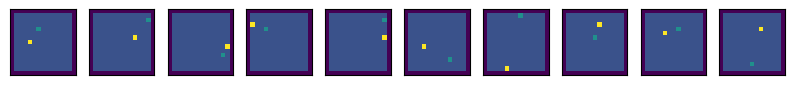

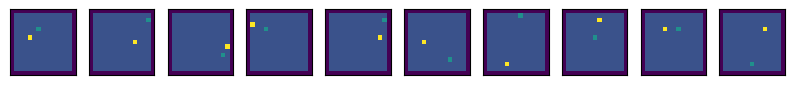

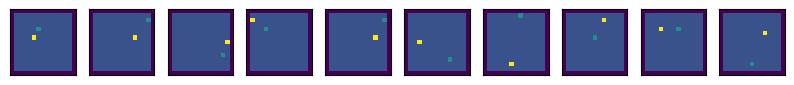

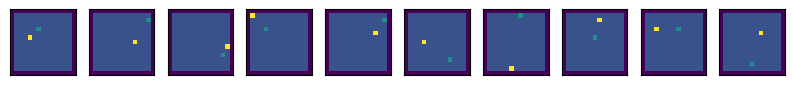

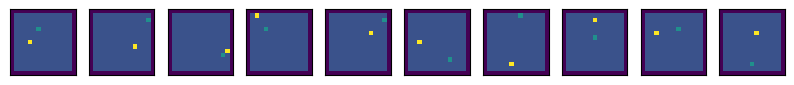

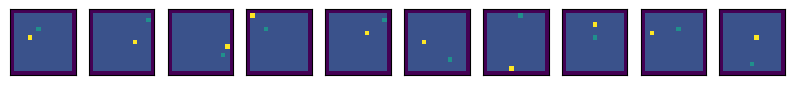

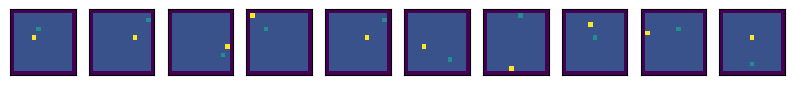

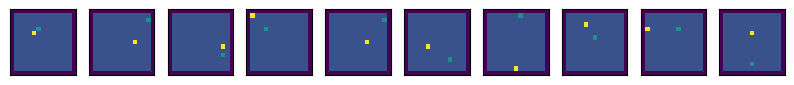

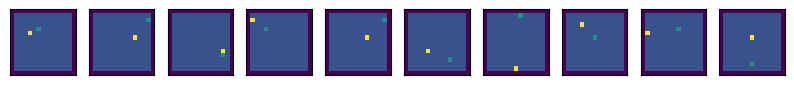

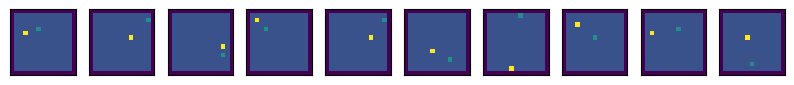

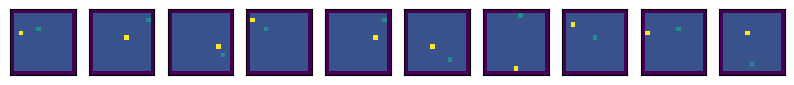

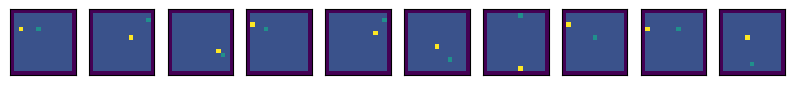

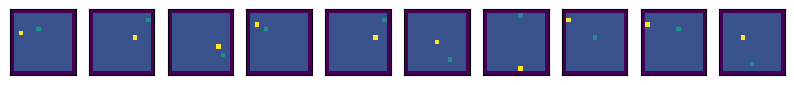

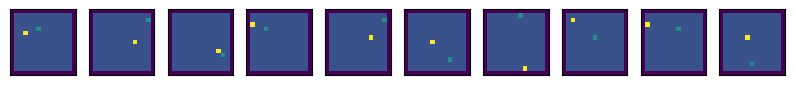

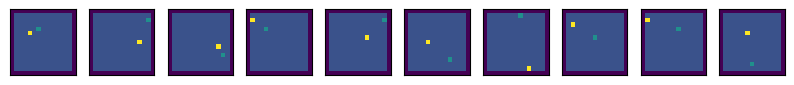

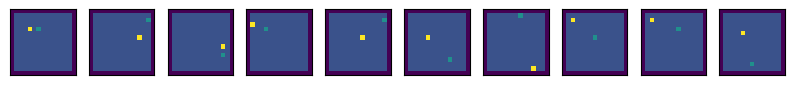

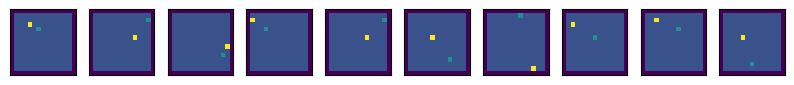

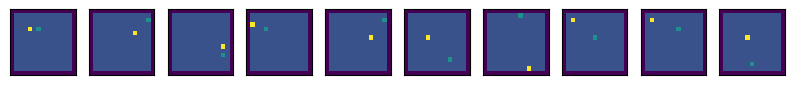

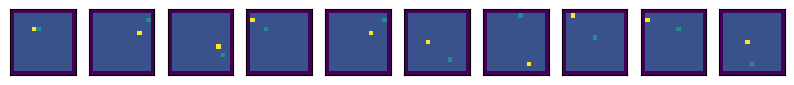

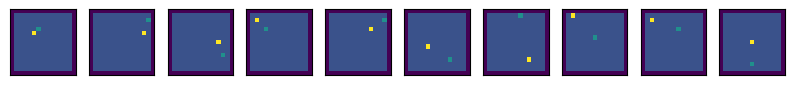

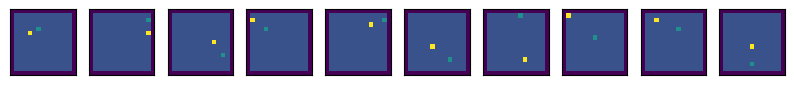

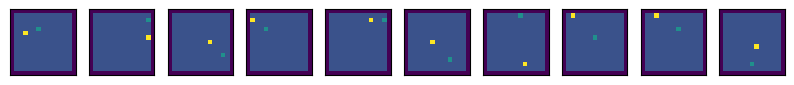

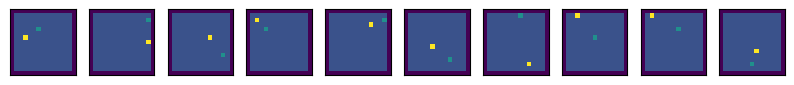

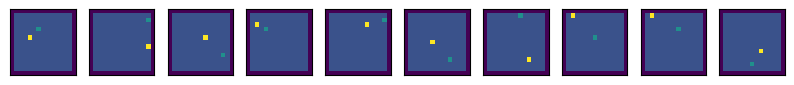

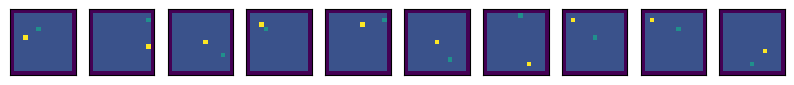

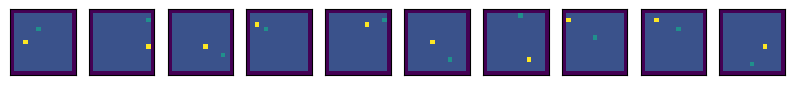

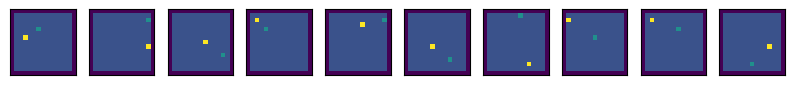

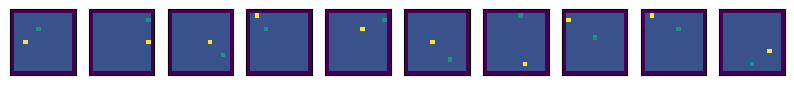

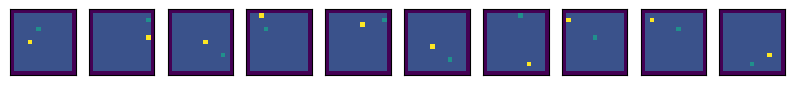

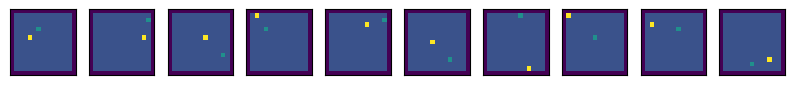

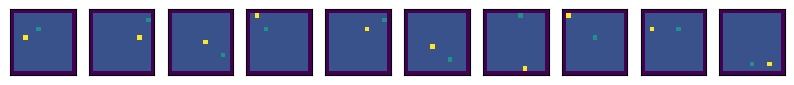

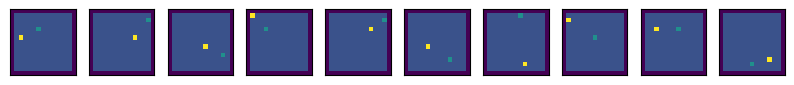

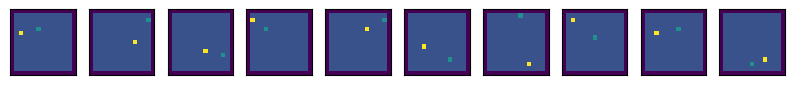

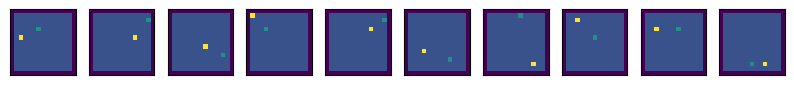

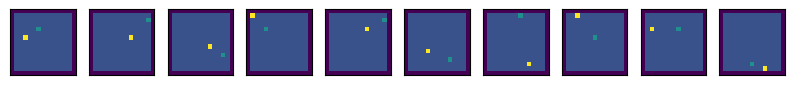

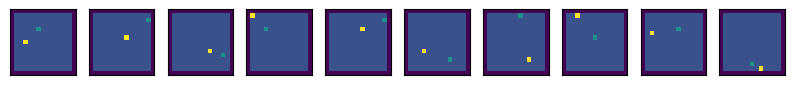

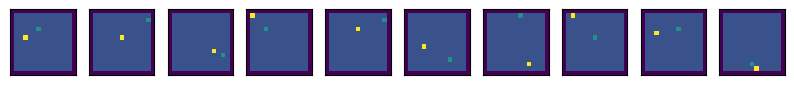

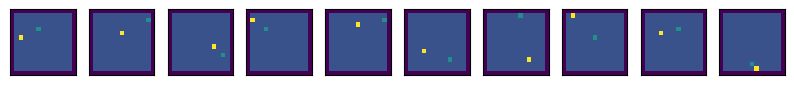

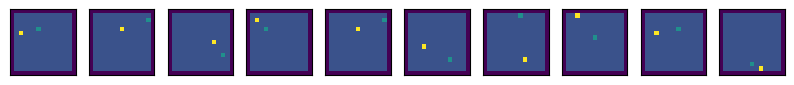

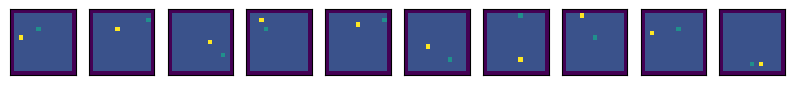

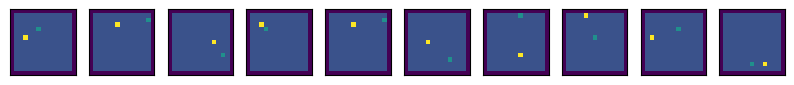

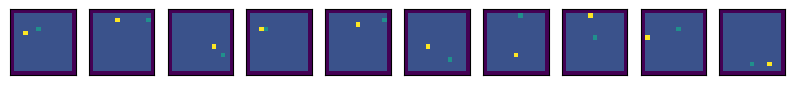

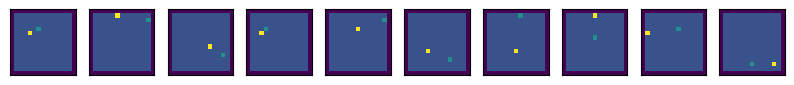

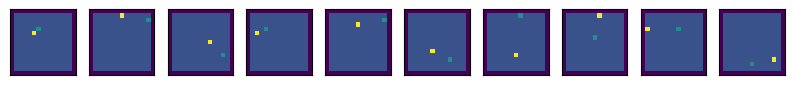

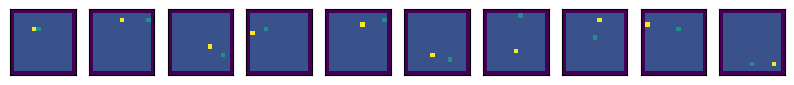

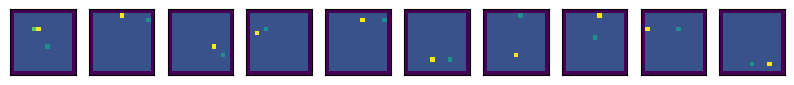

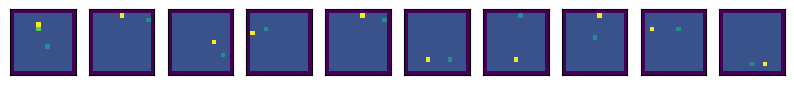

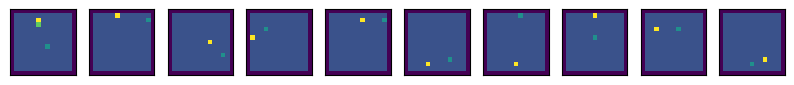

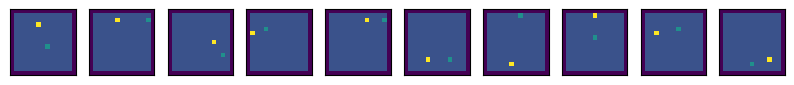

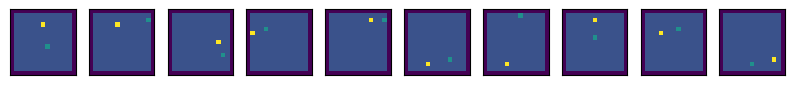

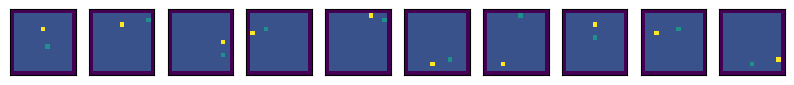

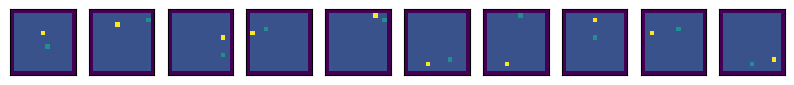

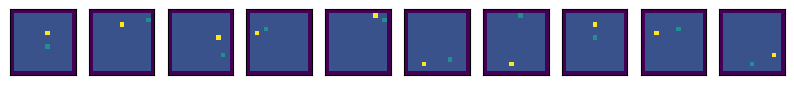

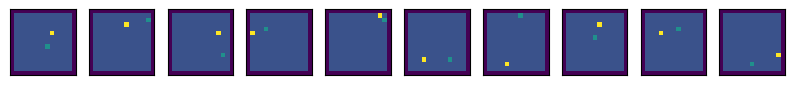

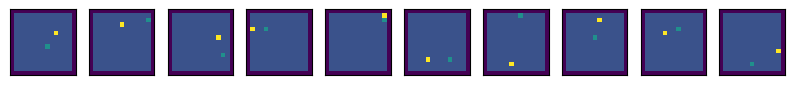

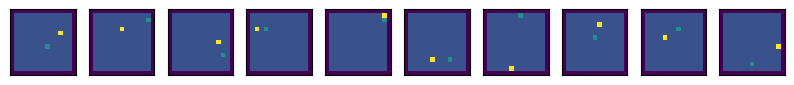

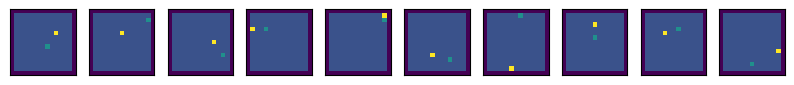

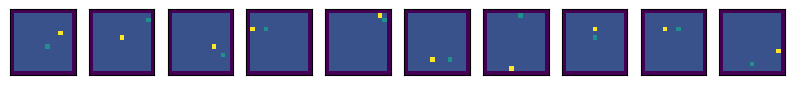

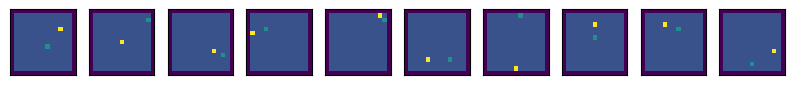

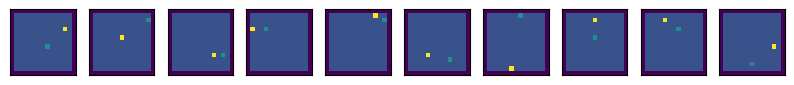

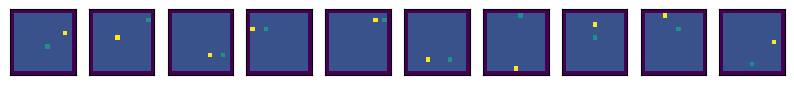

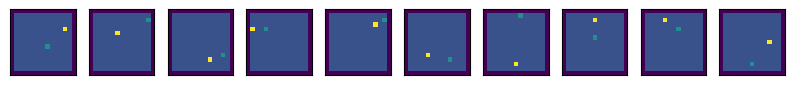

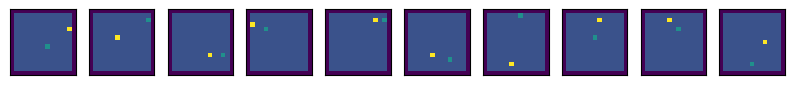

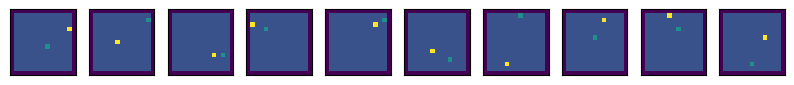

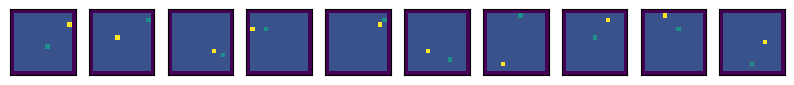

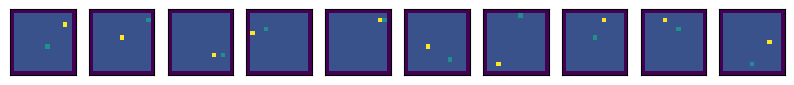

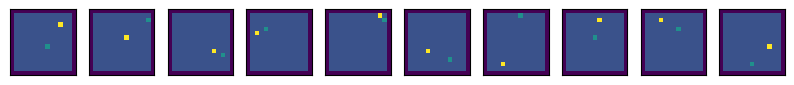

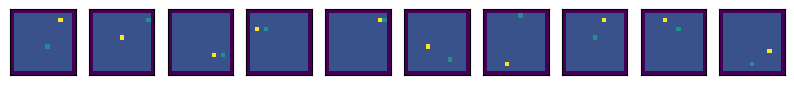

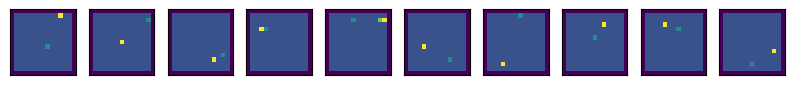

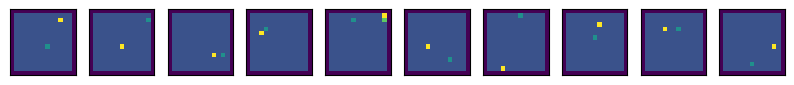

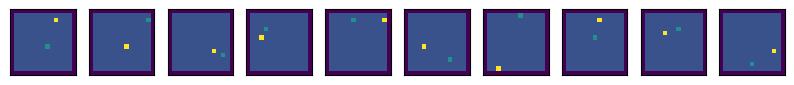

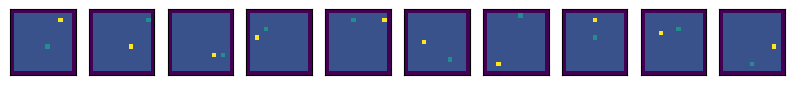

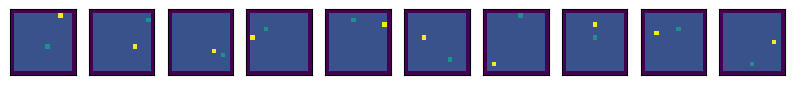

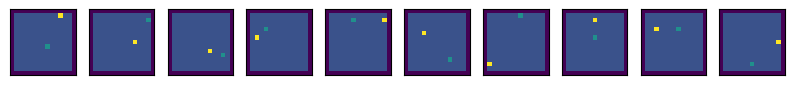

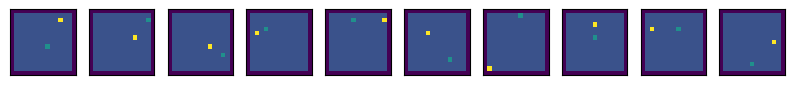

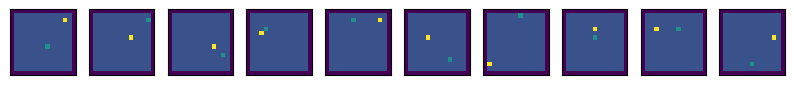

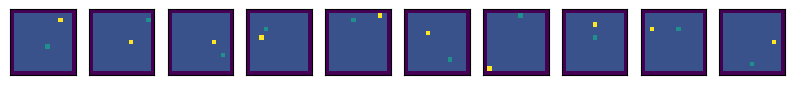

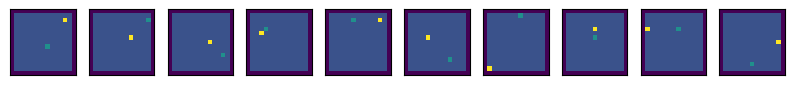

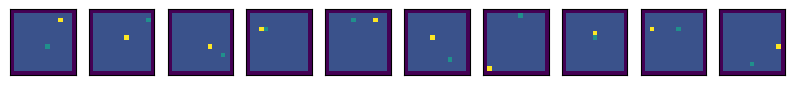

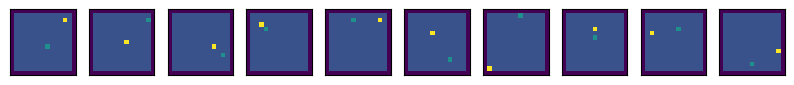

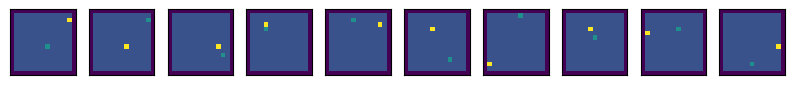

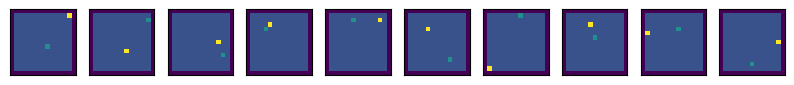

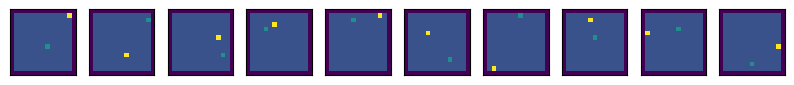

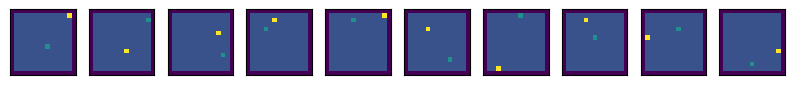

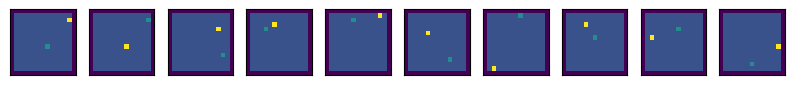

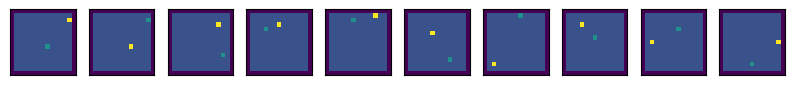

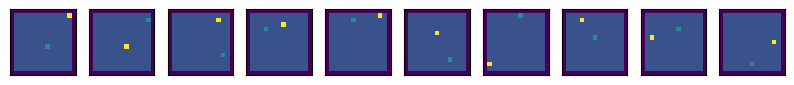

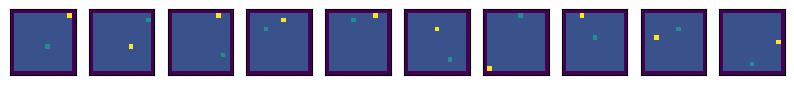

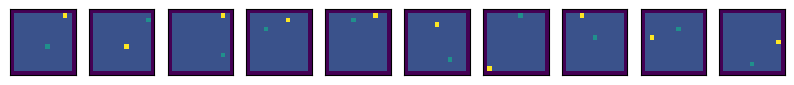

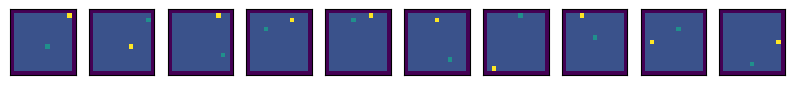

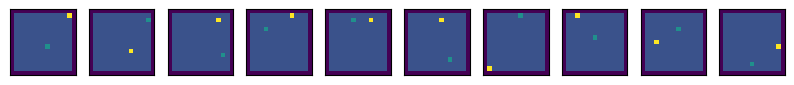

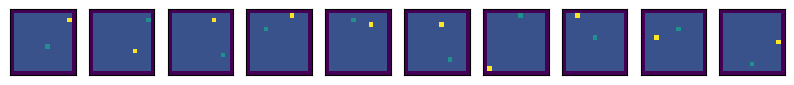

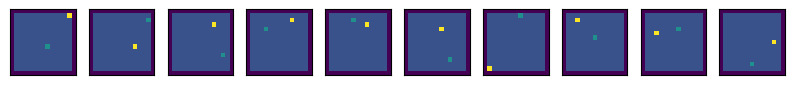

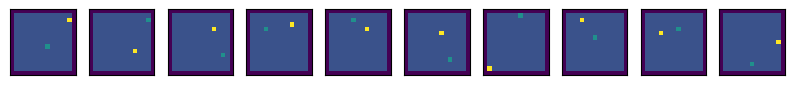

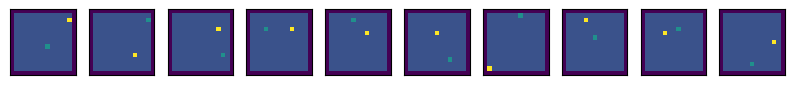

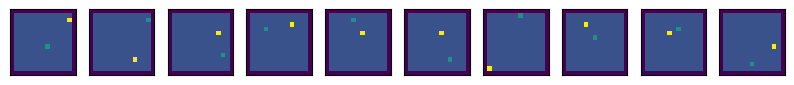

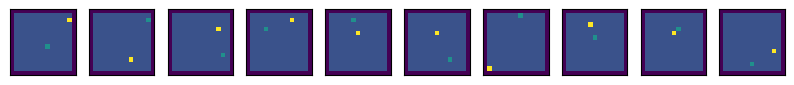

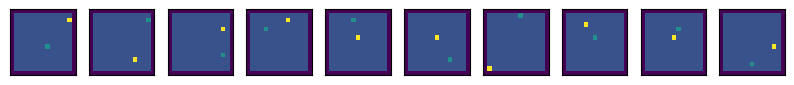

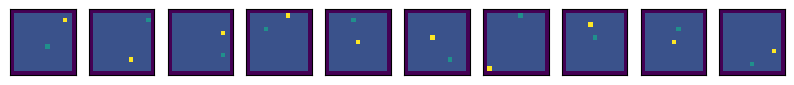

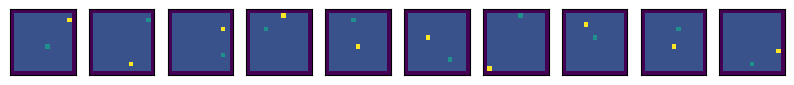

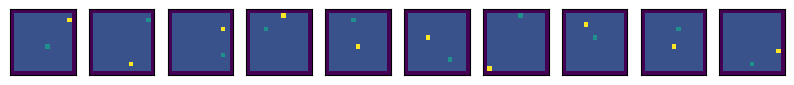

In [ ]:
env_ = get_env(10)
input_shape = env_.to_state().shape[1:]

GAMMA = .9
ITERATIONS = 300

display_boards(env_, 10)
DQN_agent.play(DQN_agent, env_, 1000)
display_boards(env_, 10)


rewards:  [[17.  17.  17.  17.  17.  17.  17.  17.  17.  17. ]
 [14.  14.  14.  14.  14.  14.  14.  14.  14.  14. ]
 [15.5 15.5 15.5 15.5 15.5 15.5 15.5 15.5 15.5 15.5]
 [15.  15.  15.  15.  15.  15.  15.  15.  15.  15. ]
 [14.  14.  14.  14.  14.  14.  14.  14.  14.  14. ]
 [13.2 13.2 13.2 13.2 13.2 13.2 13.2 13.2 13.2 13.2]
 [13.3 13.3 13.3 13.3 13.3 13.3 13.3 13.3 13.3 13.3]
 [14.8 14.8 14.8 14.8 14.8 14.8 14.8 14.8 14.8 14.8]
 [13.5 13.5 13.5 13.5 13.5 13.5 13.5 13.5 13.5 13.5]
 [14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5 14.5]]


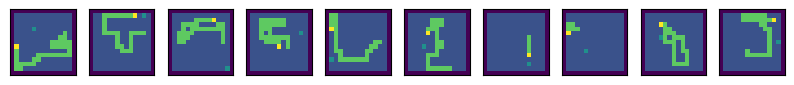

In [ ]:
import AStar_Heuristic

agent = AStar_Heuristic.Heuristic_Agent(env_)
agent.execute(ITERATIONS)


In [ ]:
for iteration in trange(ITERATIONS):
    # get current state of the boards
    state = env_.to_state()
    
    with tf.GradientTape(persistent=True) as tape:
        """ 
        tensor of actions, consider that
            UP = 0
            RIGHT = 1
            DOWN = 2
            LEFT = 3
        """
        actions = [DQN_agent.select_action(state[i]) for i in range(env_.n_boards)]
        rewards = env_.move(actions)
        new_state = tf.constant(env_.to_state())

        # calculate the loss of whichever algorithm you have picked
        loss = ...

    gradient = tape.gradient(..., ...)
    optimizer.apply_gradients(zip(gradient, ...))

  0%|          | 0/300 [00:00<?, ?it/s]


AttributeError: 'DQNAgent' object has no attribute 'select_action'

 ### Random policy reward
 
Just a baseline (not the one you are supposed to develop)

In [ ]:
random_env = get_env(100)
random_rewards = []

for _ in trange(1000):
    probs = tf.convert_to_tensor([[.25]*4]*random_env.n_boards)
    #sample actions
    actions =  tf.random.categorical(tf.math.log(probs), 1, dtype=tf.int32)
    # MDP update
    rewards = random_env.move(actions)
    random_rewards.append(np.mean(rewards))